Datasets loaded successfully.

--- 1. Data Exploration (EDA) ---

--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Training Data Summary Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000

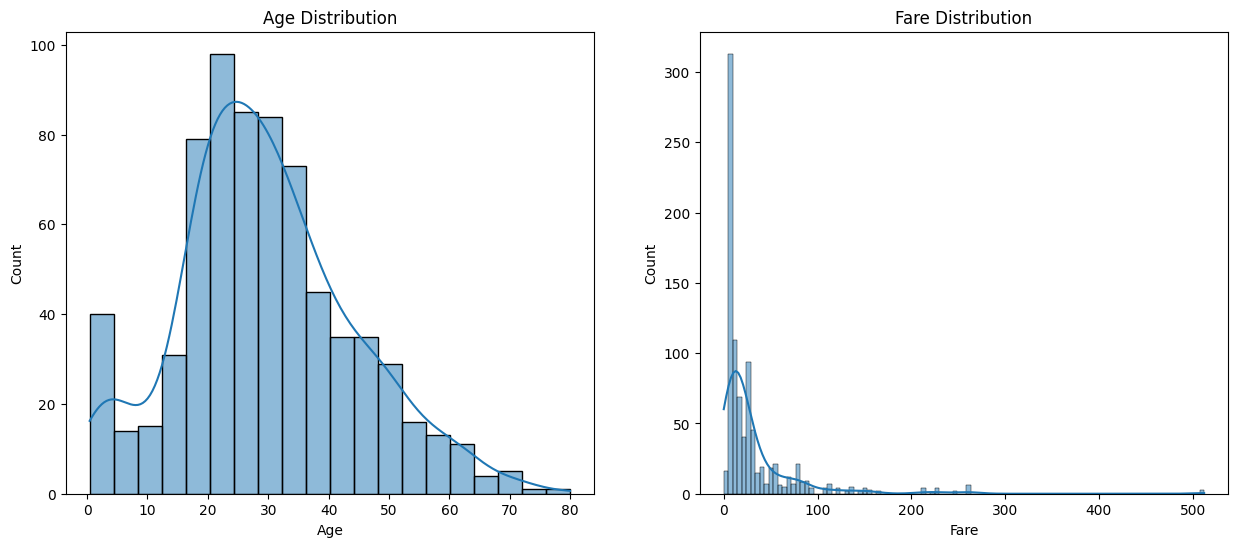

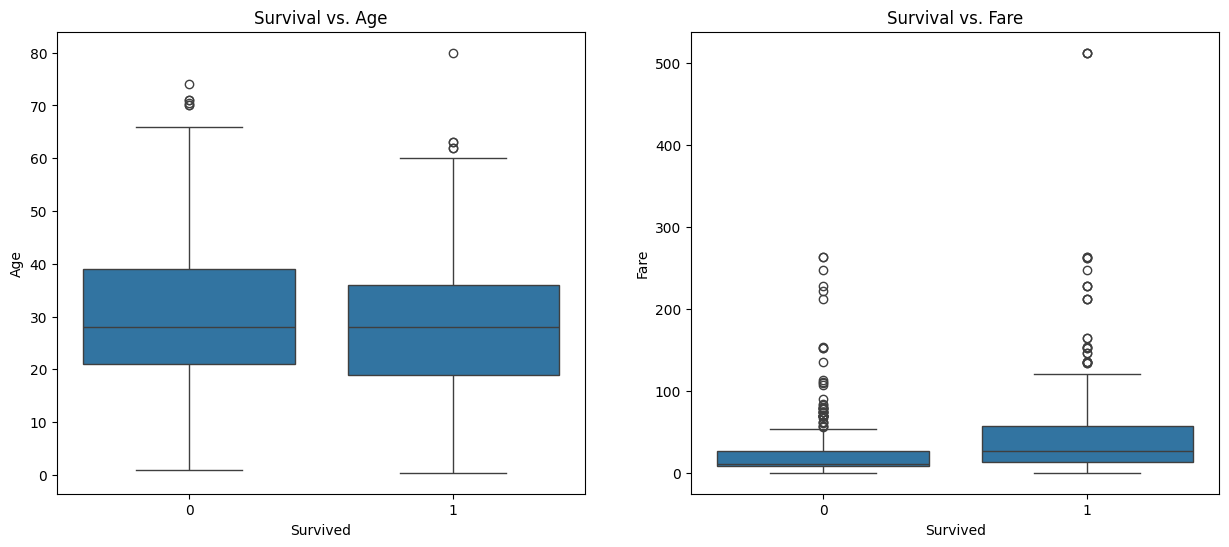

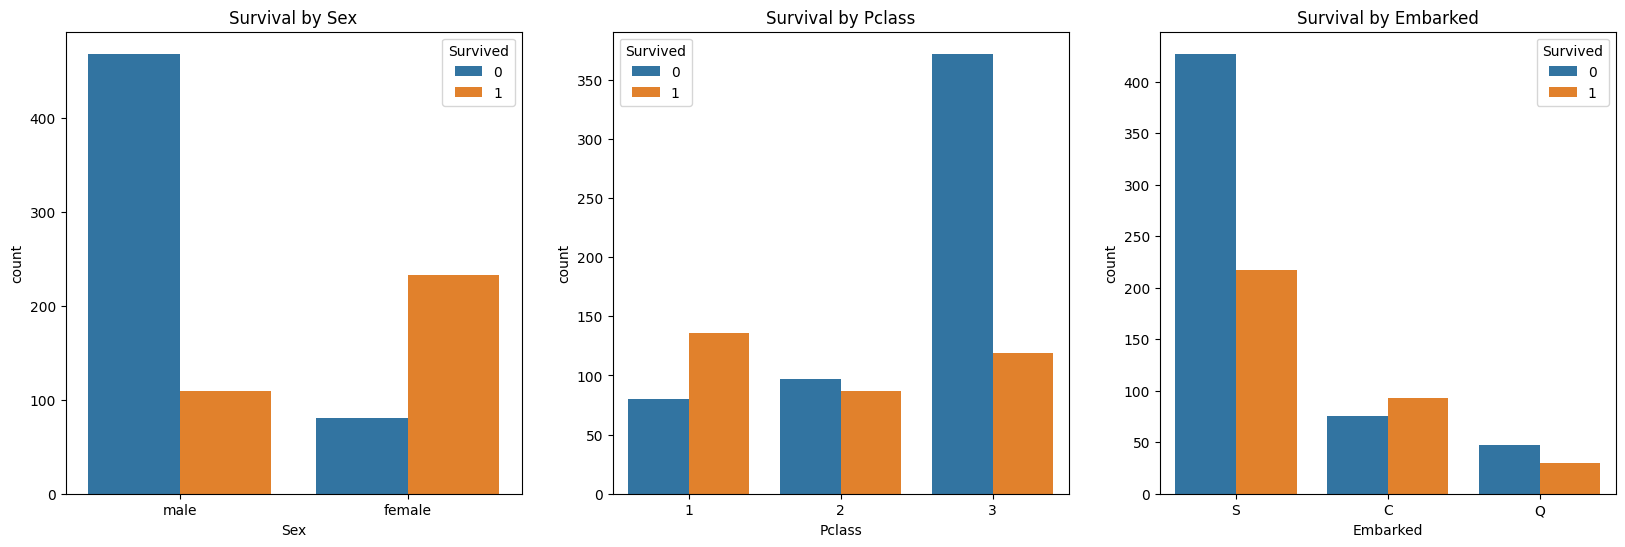

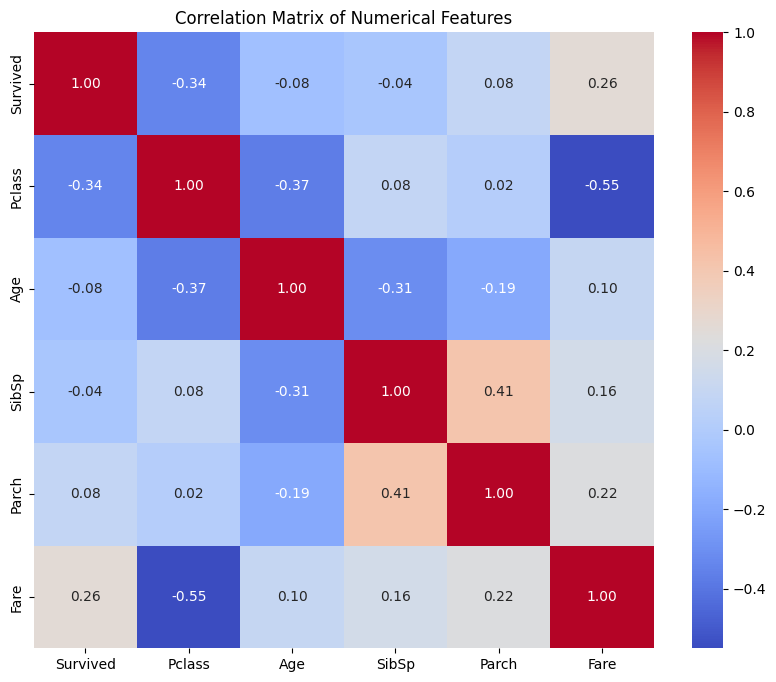


--- 2. Data Preprocessing ---
Shape of X_train: (712, 9)
Shape of X_val: (179, 9)
Shape of y_train: (712,)
Shape of y_val: (179,)

--- 3. Model Building and Training ---
Logistic Regression model trained successfully.

--- 4. Model Evaluation ---
Accuracy:  0.7877
Precision: 0.7727
Recall:    0.6892
F1-Score:  0.7286
ROC-AUC:   0.8703


/tmp/ipython-input-2149167075.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
/tmp/ipython-input-2149167075.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

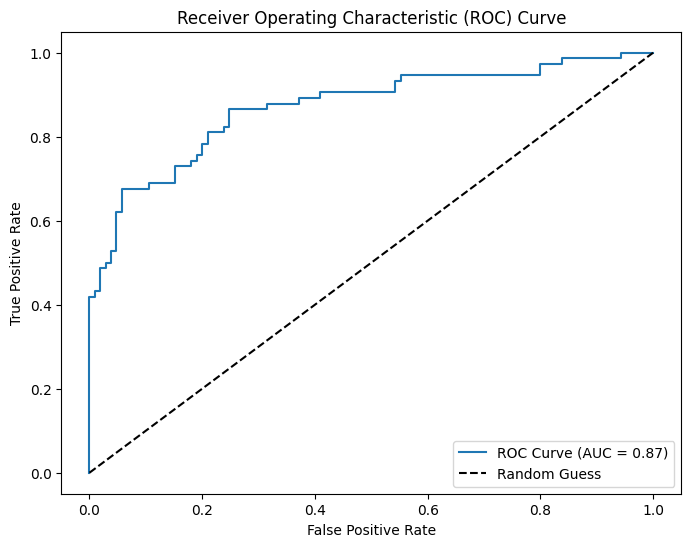


--- 5. Interpretation ---

--- Model Coefficients (Sorted by Magnitude) ---
      Feature  Coefficient
4    Sex_male    -2.471147
6    Pclass_3    -1.334310
8  Embarked_S    -0.344668
1       SibSp    -0.274808
5    Pclass_2    -0.179728
2       Parch    -0.114484
7  Embarked_Q    -0.031861
0         Age    -0.021354
3        Fare     0.005871

--- Discussion of Feature Significance ---
A positive coefficient means an increase in the feature value is associated with an increase in the probability of survival.
A negative coefficient means an increase in the feature value is associated with a decrease in the probability of survival.

Based on the coefficients, here are the key findings:
  - Sex_male: Has a negative coefficient (-2.4711). This suggests that an increase in this feature significantly decreases the odds of survival.
  - Pclass_3: Has a negative coefficient (-1.3343). This suggests that an increase in this feature significantly decreases the odds of survival.
  - Embarked_S:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# Load the datasets
try:
    train_df = pd.read_csv("Titanic_train.csv")
    test_df = pd.read_csv("Titanic_test.csv")
    print("Datasets loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}. Please ensure 'Titanic_train.csv' and 'Titanic_test.csv' are in the same directory.")
    exit()

# Part 1: Data Exploration (EDA)
# ==============================================================================

print("\n--- 1. Data Exploration (EDA) ---")
print("\n--- Training Data Info ---")
train_df.info()

print("\n--- Training Data Summary Statistics ---")
print(train_df.describe())

print("\n--- Test Data Info ---")
test_df.info()

print("\n--- Test Data Summary Statistics ---")
print(test_df.describe())

# Visualize the distributions of numerical features
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(train_df['Age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
sns.histplot(train_df['Fare'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Fare Distribution')
plt.show()

# Visualize the relationship between numerical features and survival
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='Survived', y='Age', data=train_df, ax=axes[0])
axes[0].set_title('Survival vs. Age')
sns.boxplot(x='Survived', y='Fare', data=train_df, ax=axes[1])
axes[1].set_title('Survival vs. Fare')
plt.show()

# Visualize the distributions of categorical features
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(x='Sex', hue='Survived', data=train_df, ax=axes[0])
axes[0].set_title('Survival by Sex')
sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=axes[1])
axes[1].set_title('Survival by Pclass')
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=axes[2])
axes[2].set_title('Survival by Embarked')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Part 2: Data Preprocessing
# ==============================================================================

print("\n--- 2. Data Preprocessing ---")

# Combine datasets for consistent preprocessing
# We need to preserve the 'Survived' column from the train set
train_labels = train_df['Survived']
train_df = train_df.drop('Survived', axis=1)
full_df = pd.concat([train_df, test_df], ignore_index=True)

# Drop features that are not useful for the model
full_df = full_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Handle missing values
# Impute 'Age' with the median
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
# Impute 'Fare' with the median (there's one missing value in the test set)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)
# Impute 'Embarked' with the mode (most common value)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)

# Use get_dummies for one-hot encoding on 'Sex', 'Pclass', and 'Embarked'
full_df = pd.get_dummies(full_df, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

# Separate the processed data back into training and testing sets
X_full = full_df.iloc[:len(train_labels)]
y_full = train_labels
X_test_final = full_df.iloc[len(train_labels):]

# Split the training data into a new training set and a validation set
# (80% for training, 20% for validation)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

# Part 3: Model Building and Training
# ==============================================================================
# Logistic Regression model.

print("\n--- 3. Model Building and Training ---")

log_reg_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# Part 4: Model Evaluation
# ==============================================================================

print("\n--- 4. Model Evaluation ---")
# Make predictions on the validation data
y_pred = log_reg_model.predict(X_val)
y_pred_proba = log_reg_model.predict_proba(X_val)[:, 1]

# Calculate and print evaluation metrics
print(f"Accuracy:  {accuracy_score(y_val, y_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_pred):.4f}")
print(f"Recall:    {recall_score(y_val, y_pred):.4f}")
print(f"F1-Score:  {f1_score(y_val, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_val, y_pred_proba):.4f}")

# Visualize the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Part 5: Interpretation
# ==============================================================================

print("\n--- 5. Interpretation ---")
# Get the feature names and coefficients
feature_names = X_train.columns
coefficients = log_reg_model.coef_[0]

# Create a DataFrame for better visualization and sorting
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print("\n--- Model Coefficients (Sorted by Magnitude) ---")
print(coef_df.drop('Absolute Coefficient', axis=1))

# Discuss the significance of features
print("\n--- Discussion of Feature Significance ---")
print("A positive coefficient means an increase in the feature value is associated with an increase in the probability of survival.")
print("A negative coefficient means an increase in the feature value is associated with a decrease in the probability of survival.")
print("\nBased on the coefficients, here are the key findings:")

# Analyze the top coefficients
top_features = coef_df['Feature'].values[:5]
for feature in top_features:
    coef = coef_df.loc[coef_df['Feature'] == feature, 'Coefficient'].values[0]
    if coef > 0:
        print(f"  - {feature}: Has a positive coefficient ({coef:.4f}). This suggests that an increase in this feature significantly increases the odds of survival.")
    else:
        print(f"  - {feature}: Has a negative coefficient ({coef:.4f}). This suggests that an increase in this feature significantly decreases the odds of survival.")

print("\nFor example, 'Sex_male' has a strong negative coefficient, indicating that being a male significantly decreased the chances of survival.")
print("On the other hand, 'Pclass_3' has a significant negative coefficient, meaning passengers in the third class were less likely to survive.")
print("The 'Fare' feature, despite a smaller absolute coefficient, also has a positive relationship with survival.")

# Final predictions on the unseen test data
# Note: Since the test set has no 'Survived' column, we can only generate predictions.

y_test_pred = log_reg_model.predict(X_test_final)
print("\n--- Example Predictions on the Test Data ---")
print("Predicted survival (0=No, 1=Yes) for the first 10 test passengers:")
print(y_test_pred[:10])

**train and save Pickel file for Streamlit**

In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle

# Load the dataset
try:
    train_df = pd.read_csv("Titanic_train.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading files: {e}. Please ensure 'Titanic_train.csv' is in the same directory.")
    exit()

# --- Data Preprocessing (same as before) ---

# Handle missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Fare'].fillna(train_df['Fare'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Select relevant features for the model
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train_df[features]
y = train_df['Survived']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Sex', 'Pclass', 'Embarked'], drop_first=True)

# --- Model Building and Training ---
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X, y)
print("Model trained successfully.")

# --- Save the trained model and the feature columns ---
# Saving the model to a .pkl file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as 'model.pkl'")

# Saving the feature columns to a .pkl file
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(X.columns.tolist(), file)
print("Model columns saved as 'model_columns.pkl'")

Dataset loaded successfully.
Model trained successfully.
Model saved as 'model.pkl'
Model columns saved as 'model_columns.pkl'


/tmp/ipython-input-731412305.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-731412305.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=